In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv('hr_data_updated.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         5751 non-null   int64  
 1   Candidate Ref                5751 non-null   int64  
 2   DOJ Extended                 5751 non-null   object 
 3   Duration to accept offer     5751 non-null   int64  
 4   Notice period                5751 non-null   int64  
 5   Offered band                 5751 non-null   object 
 6   Pecent hike expected in CTC  5751 non-null   float64
 7   Percent hike offered in CTC  5751 non-null   float64
 8   Percent difference CTC       5751 non-null   float64
 9   Joining Bonus                5751 non-null   object 
 10  Candidate relocate actual    5751 non-null   object 
 11  Gender                       5751 non-null   object 
 12  Candidate Source             5751 non-null   object 
 13  Rex in Yrs        

In [2]:
# Q1. model for prediction
X_features = df[['DOJ Extended', 'Duration to accept offer', 'Notice period', 'Offered band', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Joining Bonus', 'Candidate relocate actual', 'Gender', 'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age']]
Y_features = df['Status']


X = pd.get_dummies(X_features, drop_first=True)

X = sm.add_constant(X)
Y = Y_features

train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.8, random_state=42) 
model_1 = sm.Logit(train_Y, train_X)
model_1 = model_1.fit()
model_1.summary()

         Current function value: 0.487477
         Iterations: 35


C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 4600
Model:                          Logit   Df Residuals:                     4565
Method:                           MLE   Df Model:                           34
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                  0.1875
Time:                        11:38:03   Log-Likelihood:                -2242.4
converged:                      False   LL-Null:                       -2760.0
Covariance Type:            nonrobust   LLR p-value:                2.138e-195
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -5.1367      1.403     -3.662      0.000      -7.886      -2.388
Duration to accept offer               0.0016      0.001      1.102      0.271      -0.001       0.005
Notice period                         -0.0223      0.002    -12.419      0.000      -0.026      -0.019
Pecent hike expected in CTC           -0.0121      0.007     -1.798      0.072      -0.025       0.001
Percent hike offered in CTC            0.0136      0.007      1.935      0.053      -0.000       0.027
Percent difference CTC                -0.0153      0.010     -1.543      0.123      -0.035       0.004
Rex in Yrs                            -0.1229      0.025     -4.848      0.000      -0.173      -0.073
Age                                    0.0997      0.011      8.865      0.000       0.078       0.122
DOJ Extended_Yes                       0.1203      0.079      1.518      0.129      -0.035       0.276
Offered band_E1                        3.5417      0.494      7.176      0.000       2.574       4.509
Offered band_E2                        3.3316      0.507      6.565      0.000       2.337       4.326
Offered band_E3                        3.7420      0.558      6.711      0.000       2.649       4.835
Joining Bonus_Yes                      0.2458      0.171      1.436      0.151      -0.090       0.581
Candidate relocate actual_Yes         23.0099   5285.184      0.004      0.997   -1.03e+04    1.04e+04
Gender_Male                           -0.2185      0.100     -2.192      0.028      -0.414      -0.023
Candidate Source_Direct                0.1416      0.084      1.682      0.093      -0.023       0.307
Candidate Source_Employee Referral     0.6644      0.120      5.533      0.000       0.429       0.900
LOB_BFSI                               0.2517      0.175      1.435      0.151      -0.092       0.596
LOB_CSMP                               0.1830      0.197      0.928      0.354      -0.204       0.570
LOB_EAS                               -0.6060      0.230     -2.640      0.008      -1.056      -0.156
LOB_ERS                               -0.1298      0.168     -0.772      0.440      -0.459       0.200
LOB_ETS                                0.1828      0.196      0.934      0.350      -0.201       0.566
LOB_Healthcare                         0.3825      0.325      1.179      0.239      -0.254       1.019
LOB_INFRA                              0.3427      0.180      1.903      0.057      -0.010       0.696
LOB_MMS                               10.8778    202.902      0.054      0.957    -386.802     408.558
Location_Bangalore                     0.4666      1.272      0.367      0.714      -2.027       2.960
Location_Chennai                       0.5348      1.271      0.421      0.674      -1.956       3.026
Location_Cochin                        0.5963      1.699      0.351      0.726      -2.735       3.927
Location_Gurgaon                       0.2671   

In [3]:
# Q.2 make the model using significant features only
significant_features = model_1.pvalues[model_1.pvalues < 0.05].index
train_X = train_X[significant_features]
test_X = test_X[significant_features]
model_2 = sm.Logit(train_Y, train_X).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.544072
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 4600
Model:                          Logit   Df Residuals:                     4590
Method:                           MLE   Df Model:                            9
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                 0.09321
Time:                        11:38:03   Log-Likelihood:                -2502.7
converged:                       True   LL-Null:                       -2760.0
Covariance Type:            nonrobust   LLR p-value:                4.487e-105
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -4.3591      0.565     -7.717      0.000      -5.466      -3.252
Notice period                         -0.0209      0.002    -12.983      0.000      -0.024      -0.018
Rex in Yrs                            -0.1623      0.022     -7.420      0.000      -0.205      -0.119
Age                                    0.1156      0.011     10.814      0.000       0.095       0.137
Offered band_E1                        3.4685      0.495      7.005      0.000       2.498       4.439
Offered band_E2                        3.4238      0.509      6.732      0.000       2.427       4.421
Offered band_E3                        4.0517      0.548      7.395      0.000       2.978       5.126
Gender_Male                           -0.1695      0.096     -1.763      0.078      -0.358       0.019
Candidate Source_Employee Referral     0.5410      0.104      5.200      0.000       0.337       0.745
LOB_EAS                               -0.4229      0.160     -2.644      0.008      -0.736      -0.109
======================================================================================================
"""

In [4]:
#3. Find which features affect the probability positively and negatively
positive_features = model_2.params[model_2.params > 0].index
negative_features = model_2.params[model_2.params < 0].index

print("Features affecting positively are : ", positive_features)
print("Features affecting negatively are : ", negative_features)

Features affecting positively are :  Index(['Age', 'Offered band_E1', 'Offered band_E2', 'Offered band_E3',
       'Candidate Source_Employee Referral'],
      dtype='object')
Features affecting negatively are :  Index(['const', 'Notice period', 'Rex in Yrs', 'Gender_Male', 'LOB_EAS'], dtype='object')


In [5]:
# Youden's index for all possible cut-off probabilites
from sklearn import metrics
cutoff = np.arange(0.1, 0.91, 0.01)
youdens_index = []
cutoff_index = []
for i in cutoff:
    predicted_values = model_2.predict(test_X)
    predicted_values = (predicted_values > i).astype(int)
    confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
    sensitivity = confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0])
    specificity = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])
    youden_index = sensitivity + specificity - 1
    youdens_index.append(youden_index)
    cutoff_index.append(i)

print("Youden index : ", youdens_index)
max_youden = -40
optimal_cutoff = -1
for i in range(0, len(youdens_index)):
    if(youdens_index[i] > max_youden) :
        max_youden = youdens_index[i]
        optimal_cutoff = cutoff_index[i]

print("\n\noptimal cutoff value is : ", optimal_cutoff)
print("max youden value at optimal cutoff", max_youden)

Youden index :  [0.027855153203342642, 0.027855153203342642, 0.027855153203342642, 0.026592526940716343, 0.026592526940716343, 0.026592526940716343, 0.026592526940716343, 0.026592526940716343, 0.026592526940716343, 0.026592526940716343, 0.026592526940716343, 0.029378042261050563, 0.029378042261050563, 0.029378042261050563, 0.029378042261050563, 0.029378042261050563, 0.029378042261050563, 0.028115415998424487, 0.033686446639092926, 0.036471961959427146, 0.036471961959427146, 0.03520933569680085, 0.03673222475450877, 0.03825511381221691, 0.036992487549590614, 0.044086407247967196, 0.052963478799133545, 0.05905503502996545, 0.06741158099096811, 0.0732428744267184, 0.07628865254213446, 0.08490546129821896, 0.09757041163726399, 0.10213907881038797, 0.11201851382909878, 0.11911243352747536, 0.1234208379055175, 0.13760867730227067, 0.1406544554176865, 0.14800863791114494, 0.1472665372386821, 0.1530978306744324, 0.15514124532230378, 0.157444922765257, 0.16557989364396053, 0.1635751667088714, 0

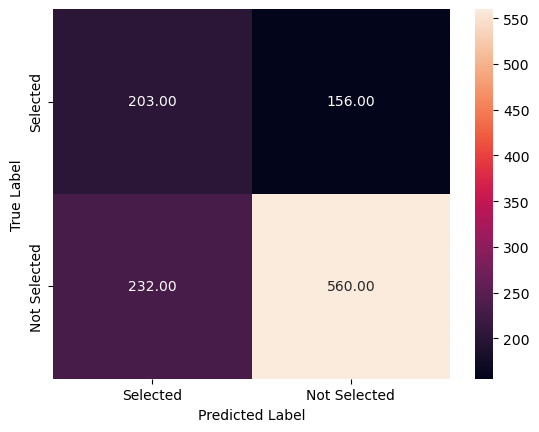



Precision of model is :  0.4666666666666667

Recall of model is :  0.5654596100278552
              precision    recall  f1-score   support

           0       0.47      0.57      0.51       359
           1       0.78      0.71      0.74       792

    accuracy                           0.66      1151
   macro avg       0.62      0.64      0.63      1151
weighted avg       0.68      0.66      0.67      1151



In [10]:
predicted_values = model_2.predict(test_X)
predicted_values = (predicted_values > optimal_cutoff).astype(int)
confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
sn.heatmap(confusion_matrix, annot=True, fmt='.2f', xticklabels=["Selected", "Not Selected"], yticklabels=["Selected", "Not Selected"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

precision = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[1][0])
recall = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])

print("\n\nPrecision of model is : ", precision)
print("\nRecall of model is : ", recall)
from sklearn import metrics
# Analysing using model summary
print( metrics.classification_report( test_Y, predicted_values ) )

In [7]:
# Predicting the cutoff by assuming cost of predicting job as no job 5 times more than no job as job
cost_based_values = []
cost_based_cutoff_indices = []
for i in cutoff:
    predicted_values = model_2.predict(test_X)
    predicted_values = (predicted_values > i).astype(int)
    confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
    cost = 5*confusion_matrix[0][1] + confusion_matrix[1][0]
    cost_based_values.append(cost)
    cost_based_cutoff_indices.append(i)
    
optimal_cutoff_cost = -1
min_cost = 1e9

for i in range(0, len(cost_based_cutoff_indices)):
    if(cost_based_values[i] < min_cost) :
        min_cost = cost_based_values[i]
        optimal_cutoff_cost = cost_based_cutoff_indices[i]

print("\nOptimal cutoff is : ", optimal_cutoff_cost)


Optimal cutoff is :  0.8299999999999996


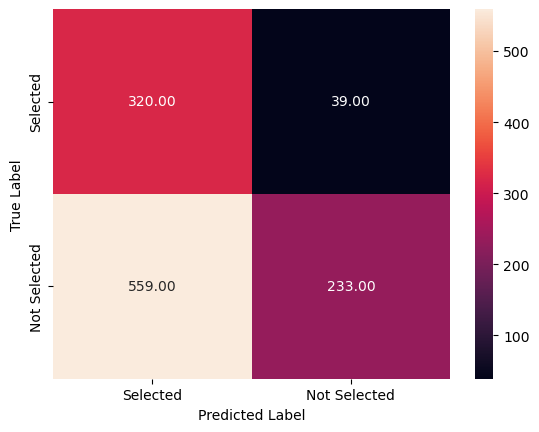



Precision of model is :  0.3640500568828214

Recall of model is :  0.8913649025069638


In [8]:
# Finding the precision and recall for cost based method
predicted_values = model_2.predict(test_X)
predicted_values = (predicted_values > optimal_cutoff_cost).astype(int)
confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
sn.heatmap(confusion_matrix, annot=True, fmt='.2f', xticklabels=["Selected", "Not Selected"], yticklabels=["Selected", "Not Selected"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

precision = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[1][0])
recall = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])

print("\n\nPrecision of model is : ", precision)
print("\nRecall of model is : ", recall)

In [11]:
from sklearn import metrics
# Analysing using model summary
print( metrics.classification_report( test_Y, predicted_values ) )

NameError: name 'predicted_values_1' is not defined